<a href="https://colab.research.google.com/github/AkhileshMauryaa/Electrical_Vehical_MarketSegment_Analysis/blob/main/electric_car_market_segament_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Necessary Libraries

In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

# Load the Dataset

In [167]:
df = pd.read_csv('/content/ElectricCarData_Norm.csv')

In [168]:
df.head()

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6 sec,233 km/h,450 km,161 Wh/km,940 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0 sec,160 km/h,270 km,167 Wh/km,250 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7 sec,210 km/h,400 km,181 Wh/km,620 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8 sec,180 km/h,360 km,206 Wh/km,560 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5 sec,145 km/h,170 km,168 Wh/km,190 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997


# View the Dataset

In [169]:
df.shape

(103, 14)

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Brand        103 non-null    object
 1   Model        103 non-null    object
 2   Accel        103 non-null    object
 3   TopSpeed     103 non-null    object
 4   Range        103 non-null    object
 5   Efficiency   103 non-null    object
 6   FastCharge   103 non-null    object
 7   RapidCharge  103 non-null    object
 8   PowerTrain   103 non-null    object
 9   PlugType     103 non-null    object
 10  BodyStyle    103 non-null    object
 11  Segment      103 non-null    object
 12  Seats        103 non-null    int64 
 13  PriceEuro    103 non-null    int64 
dtypes: int64(2), object(12)
memory usage: 11.4+ KB


In [171]:
df.isnull().sum()

Brand          0
Model          0
Accel          0
TopSpeed       0
Range          0
Efficiency     0
FastCharge     0
RapidCharge    0
PowerTrain     0
PlugType       0
BodyStyle      0
Segment        0
Seats          0
PriceEuro      0
dtype: int64

In [172]:
df.describe(include='all')

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
count,103,103,103,103,103,103,103,103,103,103,103,103,103.000000,103.000000
unique,33,102,55,25,50,54,51,2,3,4,9,8,NaN,NaN
top,Tesla,e-Soul 64 kWh,9.0 sec,160 km/h,250 km,168 Wh/km,230 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,SUV,C,NaN,NaN
freq,13,2,7,15,6,6,6,98,41,90,45,30,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.883495,55811.563107
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.795834,34134.665280
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,20129.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,34429.500000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,45000.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,65000.000000


In [173]:
df.duplicated().sum()

0

# Data cleaning

In [174]:
df['Price'] = df['PriceEuro'] * 90

In [175]:
df.head(2)

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro,Price
0,Tesla,Model 3 Long Range Dual Motor,4.6 sec,233 km/h,450 km,161 Wh/km,940 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480,4993200
1,Volkswagen,ID.3 Pure,10.0 sec,160 km/h,270 km,167 Wh/km,250 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000,2700000


In [176]:
df.drop(['PriceEuro'], axis=1, inplace=True)

In [177]:
df.head(2)

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,Price
0,Tesla,Model 3 Long Range Dual Motor,4.6 sec,233 km/h,450 km,161 Wh/km,940 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,4993200
1,Volkswagen,ID.3 Pure,10.0 sec,160 km/h,270 km,167 Wh/km,250 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,2700000


In [178]:
df[df['FastCharge'].str.contains('-')]

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,Price
57,Renault,Twingo ZE,12.6 sec,135 km/h,130 km,164 Wh/km,-,Rapid charging not possible,Rear Wheel Drive,Type 2,Hatchback,A,4,2231100
68,Renault,Kangoo Maxi ZE 33,22.4 sec,130 km/h,160 km,194 Wh/km,-,Rapid charging not possible,Front Wheel Drive,Type 2,SPV,N,5,3420000
77,Smart,EQ forfour,12.7 sec,130 km/h,95 km,176 Wh/km,-,Rapid charging not possible,Rear Wheel Drive,Type 2,Hatchback,A,4,1982700
82,Smart,EQ fortwo coupe,11.6 sec,130 km/h,100 km,167 Wh/km,-,Rapid charging not possible,Rear Wheel Drive,Type 2,Hatchback,A,2,1924830
91,Smart,EQ fortwo cabrio,11.9 sec,130 km/h,95 km,176 Wh/km,-,Rapid charging not possible,Rear Wheel Drive,Type 2,Cabrio,A,2,2210850


In [179]:
# Replace '-' in 'FastCharge' with NaN and fill with mode
df['FastCharge'] = df['FastCharge'].replace('-', np.nan)
df['FastCharge'] = df['FastCharge'].fillna(df['FastCharge'].mode())

In [180]:
df['Accel'] = df['Accel'].str.replace(' sec', '').astype(float)
df['TopSpeed'] = df['TopSpeed'].str.replace(' km/h', '').astype(float)
df['Range'] = df['Range'].str.replace(' km', '').astype(float)
df['Efficiency'] = df['Efficiency'].str.replace(' Wh/km', '').astype(float)
df['FastCharge'] = df['FastCharge'].str.replace(' km/h', '').astype(float)

In [181]:
df.isnull().sum()

Brand          0
Model          0
Accel          0
TopSpeed       0
Range          0
Efficiency     0
FastCharge     5
RapidCharge    0
PowerTrain     0
PlugType       0
BodyStyle      0
Segment        0
Seats          0
Price          0
dtype: int64

In [182]:
df['FastCharge'] = df['FastCharge'].fillna(df['FastCharge'].mean())

In [183]:
df.head(2)

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,Price
0,Tesla,Model 3 Long Range Dual Motor,4.6,233.0,450.0,161.0,940.0,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,4993200
1,Volkswagen,ID.3 Pure,10.0,160.0,270.0,167.0,250.0,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,2700000


# EDA

#  Demographic Segmentation

In [184]:
import warnings
warnings.filterwarnings('ignore')

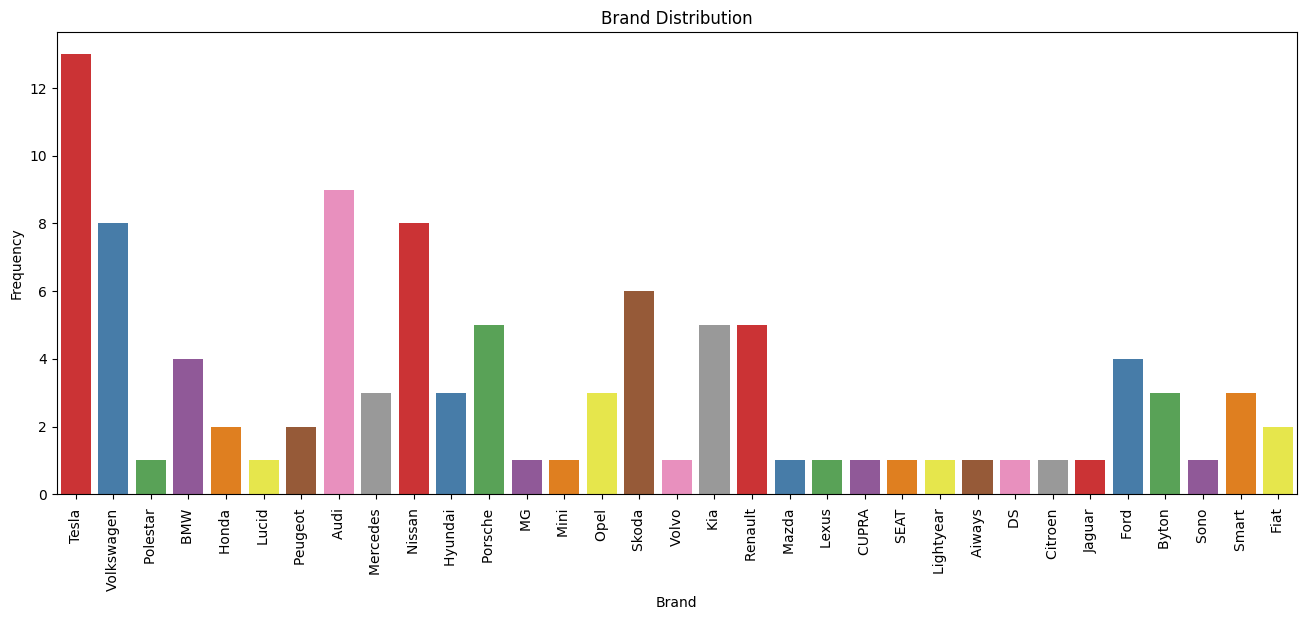

In [188]:
plt.figure(figsize=(16, 6))
sns.countplot(x='Brand', data=df, palette='Set1')
plt.title('Brand Distribution')
plt.xlabel('Brand')
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.show()

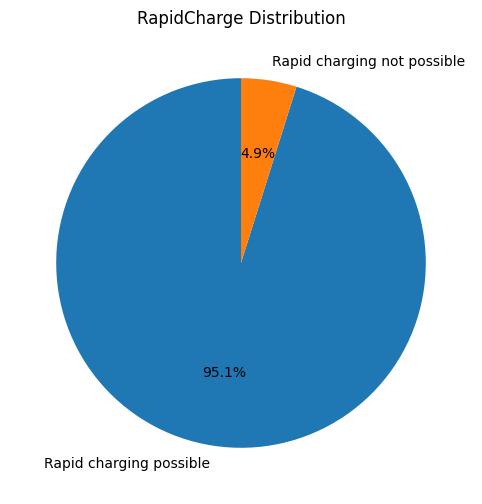

In [194]:
counts = df['RapidCharge'].value_counts()

plt.figure(figsize=(16, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('RapidCharge Distribution')
plt.show()

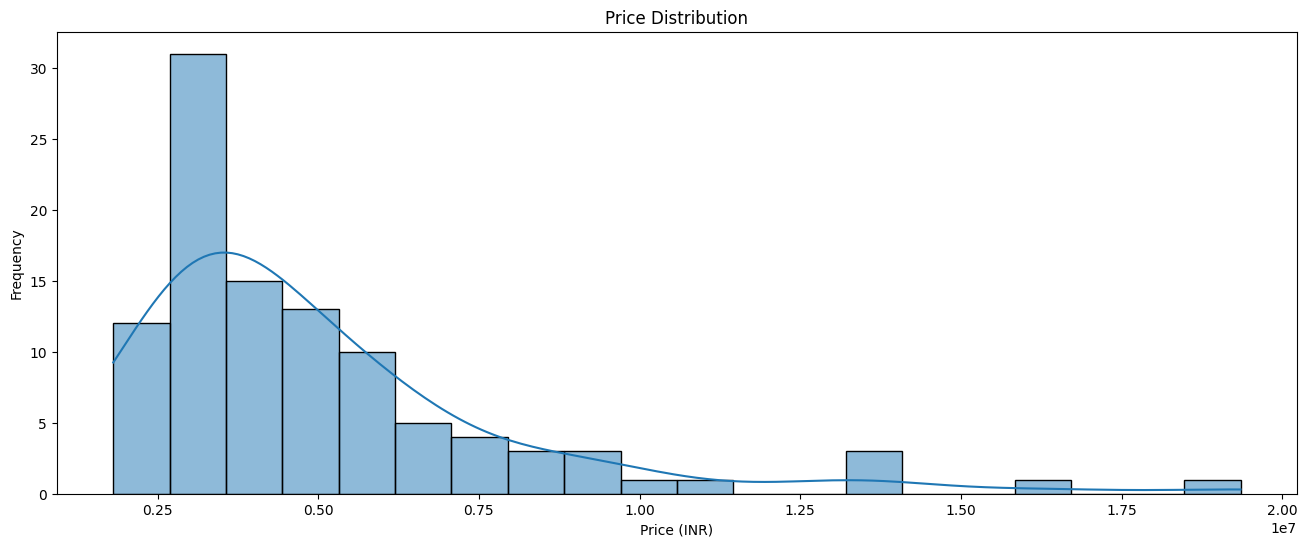

In [195]:
# Plot Price distribution
plt.figure(figsize=(16, 6))
sns.histplot(df['Price'], bins=20, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price (INR)')
plt.ylabel('Frequency')
plt.show()

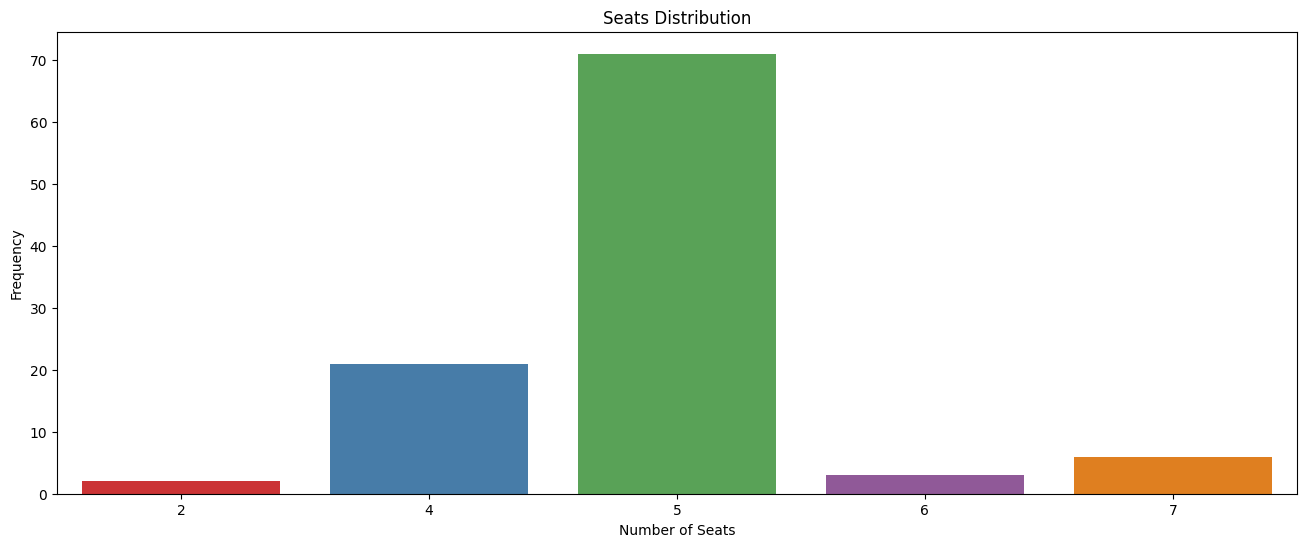

In [196]:
# Plot Seats distribution
plt.figure(figsize=(16, 6))
sns.countplot(x='Seats', data=df, palette='Set1')
plt.title('Seats Distribution')
plt.xlabel('Number of Seats')
plt.ylabel('Frequency')
plt.show()

# Behavioral Segmentation

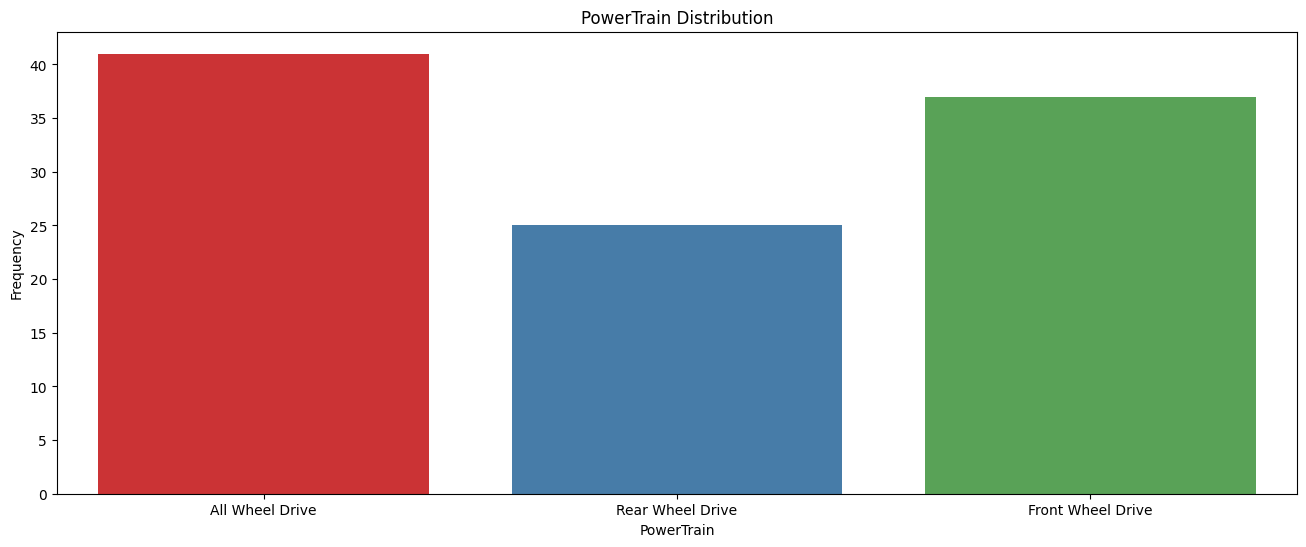

In [197]:
# Plot PowerTrain distribution
plt.figure(figsize=(16, 6))
sns.countplot(x='PowerTrain', data=df, palette='Set1')
plt.title('PowerTrain Distribution')
plt.xlabel('PowerTrain')
plt.ylabel('Frequency')
plt.show()


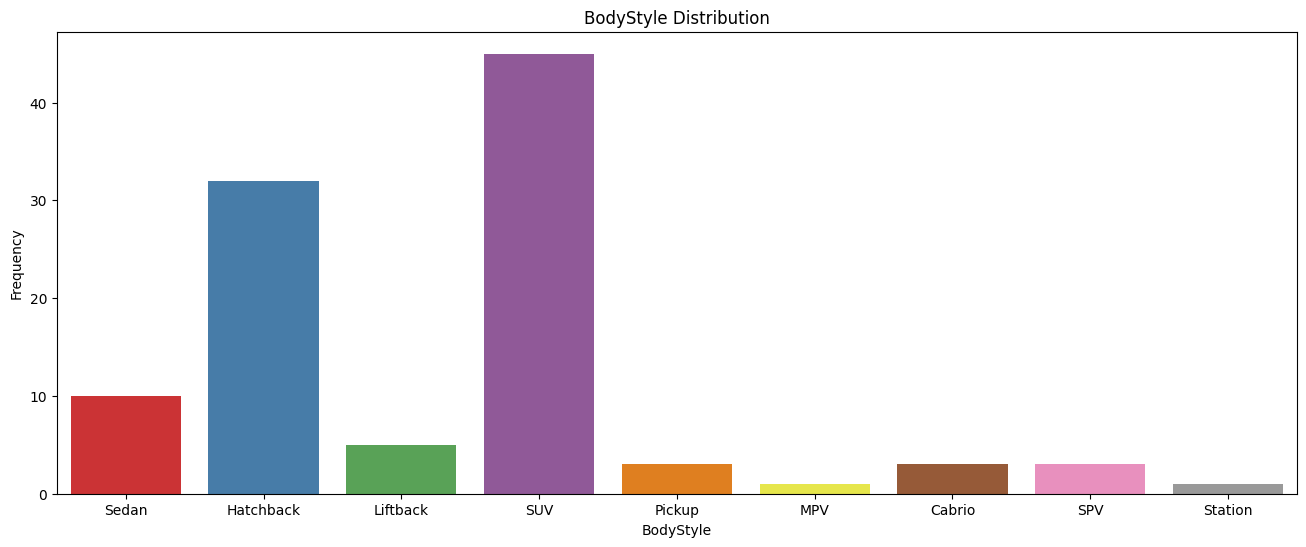

In [198]:
# Plot BodyStyle distribution
plt.figure(figsize=(16, 6))
sns.countplot(x='BodyStyle', data=df, palette='Set1')
plt.title('BodyStyle Distribution')
plt.xlabel('BodyStyle')
plt.ylabel('Frequency')
plt.show()

# Feature Engineering:

In [199]:
from sklearn.model_selection import train_test_split

# Identify and encode categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Use OneHotEncoder to convert categorical variables to numerical
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_features = encoder.fit_transform(df[categorical_columns])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_columns))

# Combine the encoded features with the rest of the dataframe
df_encoded = pd.concat([df.drop(columns=categorical_columns), encoded_df], axis=1)
df_encoded

,Accel,TopSpeed,Range,Efficiency,FastCharge,Seats,Price,Brand_Audi,Brand_BMW,Brand_Byton,...,BodyStyle_SUV,BodyStyle_Sedan,BodyStyle_Station,Segment_B,Segment_C,Segment_D,Segment_E,Segment_F,Segment_N,Segment_S
0,4.6,233.0,450.0,161.0,940.0,5,4993200,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,10.0,160.0,270.0,167.0,250.0,5,2700000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,4.7,210.0,400.0,181.0,620.0,5,5079600,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,6.8,180.0,360.0,206.0,560.0,5,6123600,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,9.5,145.0,170.0,168.0,190.0,4,2969730,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,7.5,160.0,330.0,191.0,440.0,5,4050000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
99,4.5,210.0,335.0,258.0,540.0,5,8644500,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
100,5.9,200.0,325.0,194.0,440.0,5,4500000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
101,5.1,200.0,375.0,232.0,450.0,5,5850000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [200]:
# Standardizing the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

In [201]:
from sklearn.decomposition import PCA
 #Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
df_pca = pca.fit_transform(df_scaled)

# Segmentation Analysis with K-means Clustering

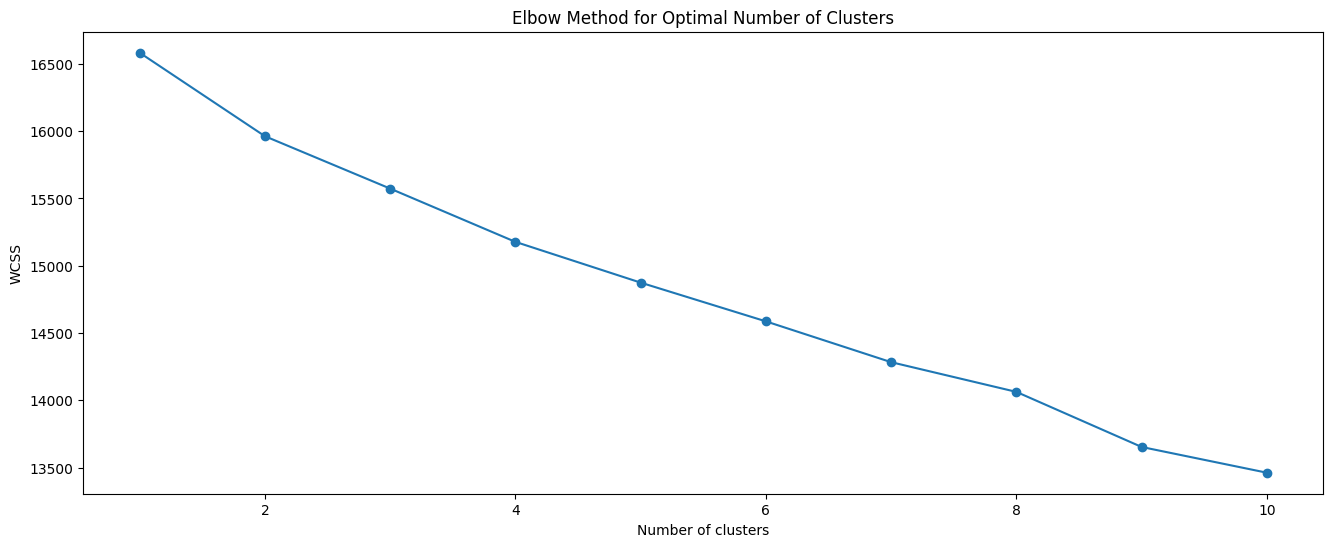

In [202]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(16, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [203]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df_pca)

KMeans(n_clusters=4, random_state=42)

In [204]:
df['Cluster'] = kmeans.labels_

In [205]:
silhouette_avg = silhouette_score(df_pca, kmeans.labels_)
print('Silhouette Score: ', silhouette_avg)

Silhouette Score:  0.0051610598040462185


In [206]:
df_pca_df = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(df_pca.shape[1])])

In [207]:
df_pca_df['Cluster'] = kmeans.labels_

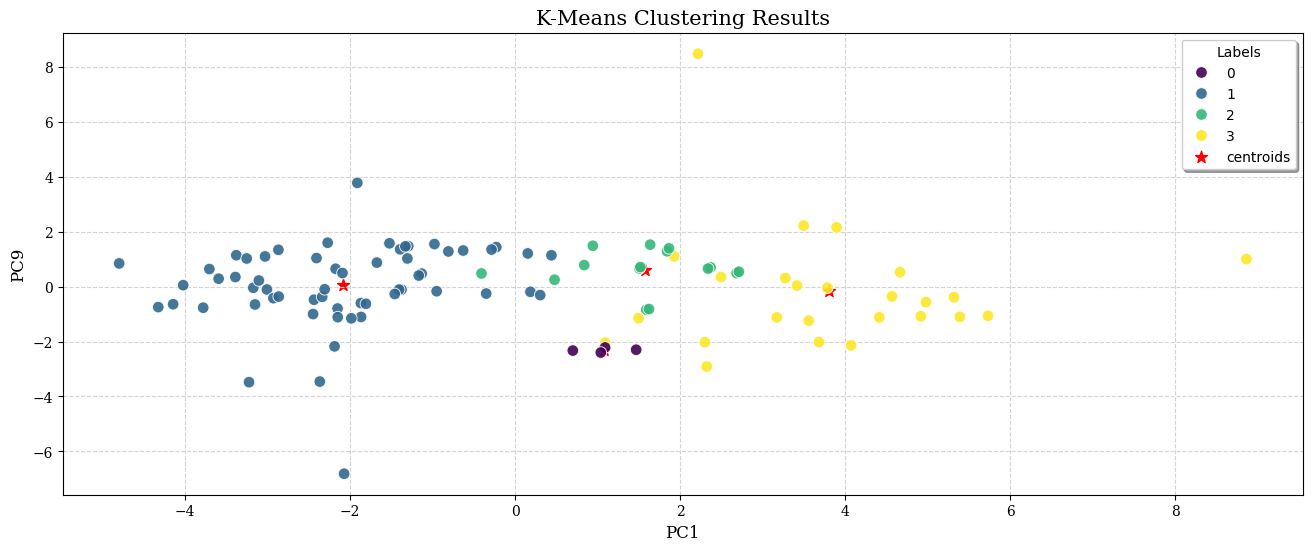

In [208]:
# Scatter plot for PC1 and PC9
plt.figure(figsize=(16, 6))
sns.scatterplot(data=df_pca_df, x='PC1', y='PC9', s=70, hue='Cluster', palette='viridis', zorder=2, alpha=0.9)
plt.scatter(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 8], marker="*", c="r", s=80, label="centroids")
plt.xlabel('PC1', family='serif', size=12)
plt.ylabel('PC9', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.grid()
plt.tick_params(grid_color='lightgray', grid_linestyle='--', zorder=1)
plt.legend(title='Labels', fancybox=True, shadow=True)
plt.title('K-Means Clustering Results', family='serif', size=15)
plt.show()